In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller



In [20]:
csv_path = ''
df = pd.read_csv(csv_path, parse_dates=['date'])
print(df.head())

   longitude  latitude                date  soil_moisture
0  -95.36826  40.54836 2020-01-01 00:00:00       0.340003
1  -95.36826  40.54836 2020-01-01 03:00:00       0.339953
2  -95.36826  40.54836 2020-01-01 06:00:00       0.339912
3  -95.36826  40.54836 2020-01-01 09:00:00       0.339873
4  -95.36826  40.54836 2020-01-01 12:00:00       0.339825


/var/folders/rl/9q_x7dw54pxf8fg3ycvj030c0000gn/T/ipykernel_16907/3422551190.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_data = locdata['soil_moisture'].resample(freq).mean().dropna()
/var/folders/rl/9q_x7dw54pxf8fg3ycvj030c0000gn/T/ipykernel_16907/3422551190.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_data = locdata['soil_moisture'].resample(freq).mean().dropna()


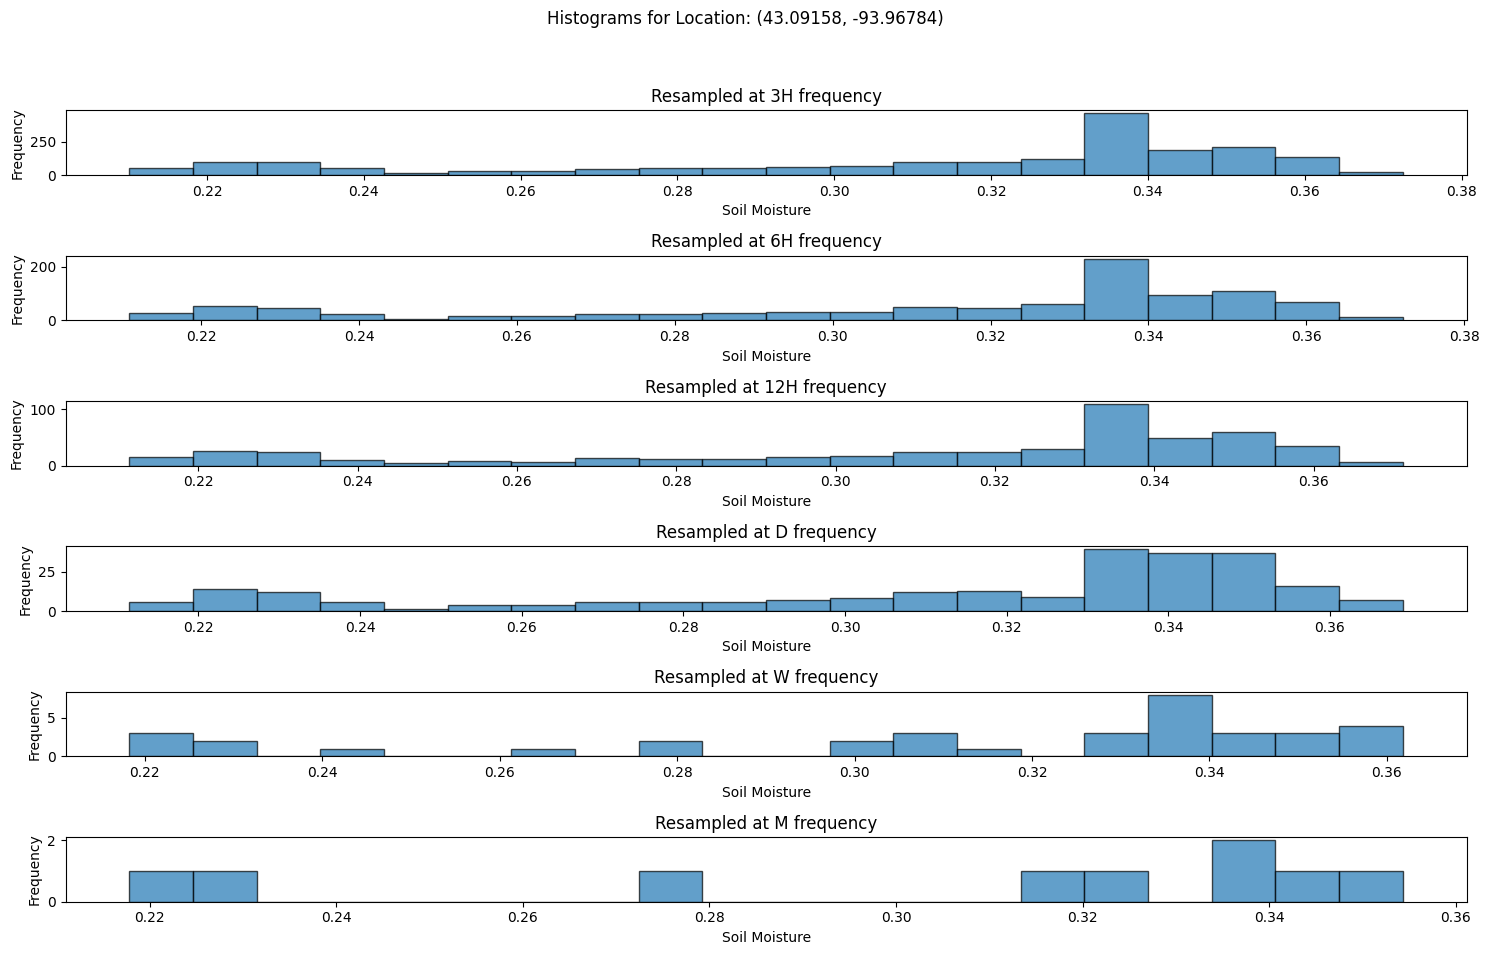

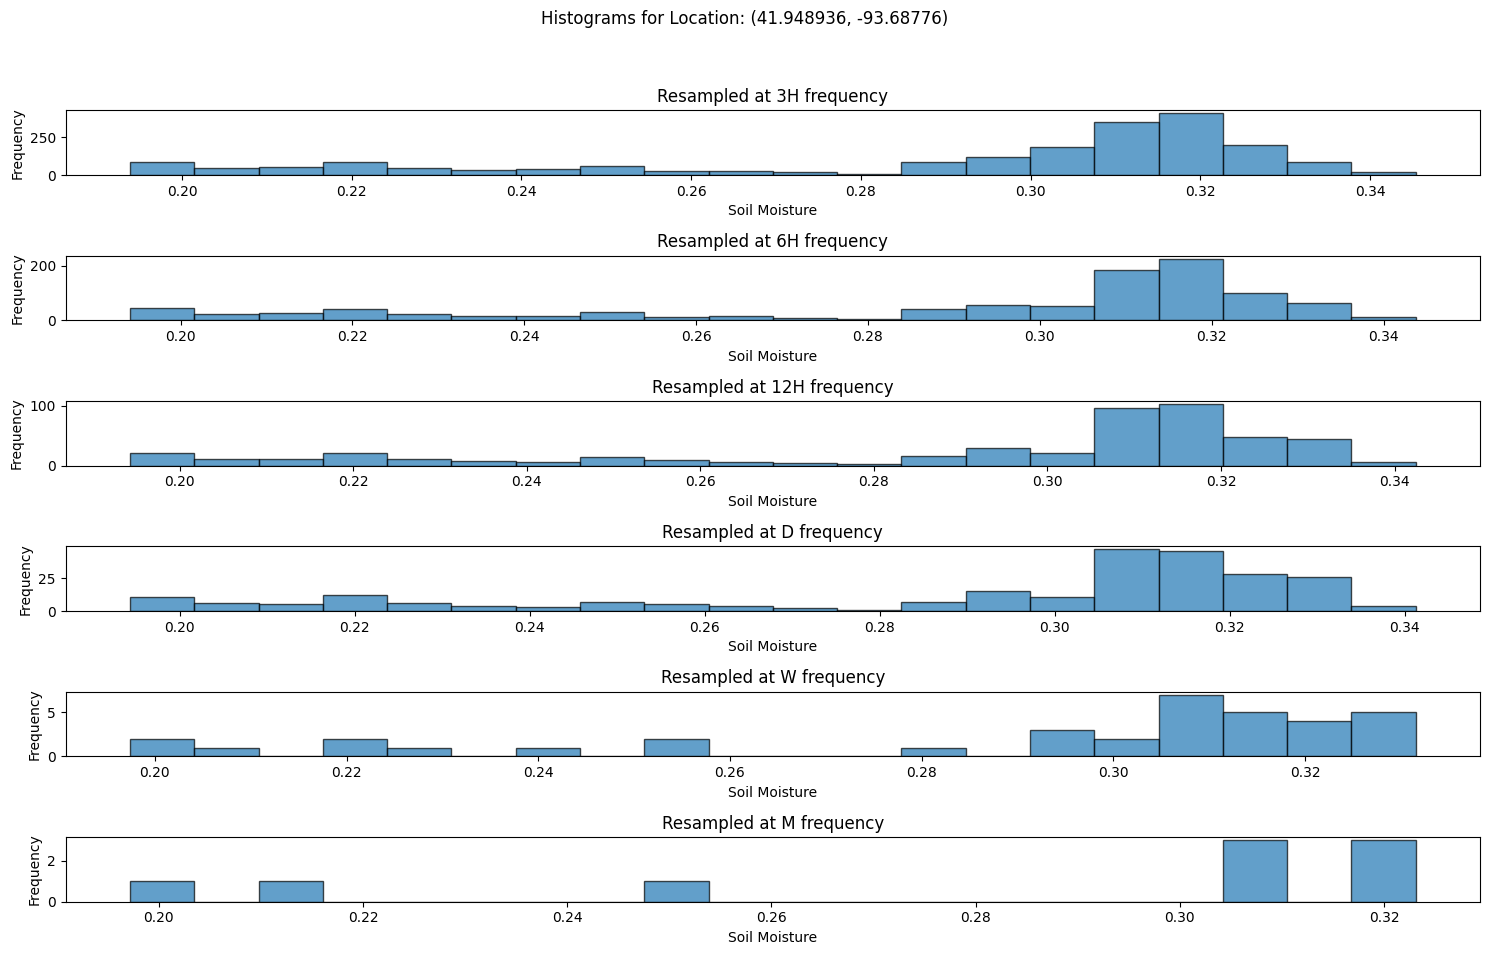

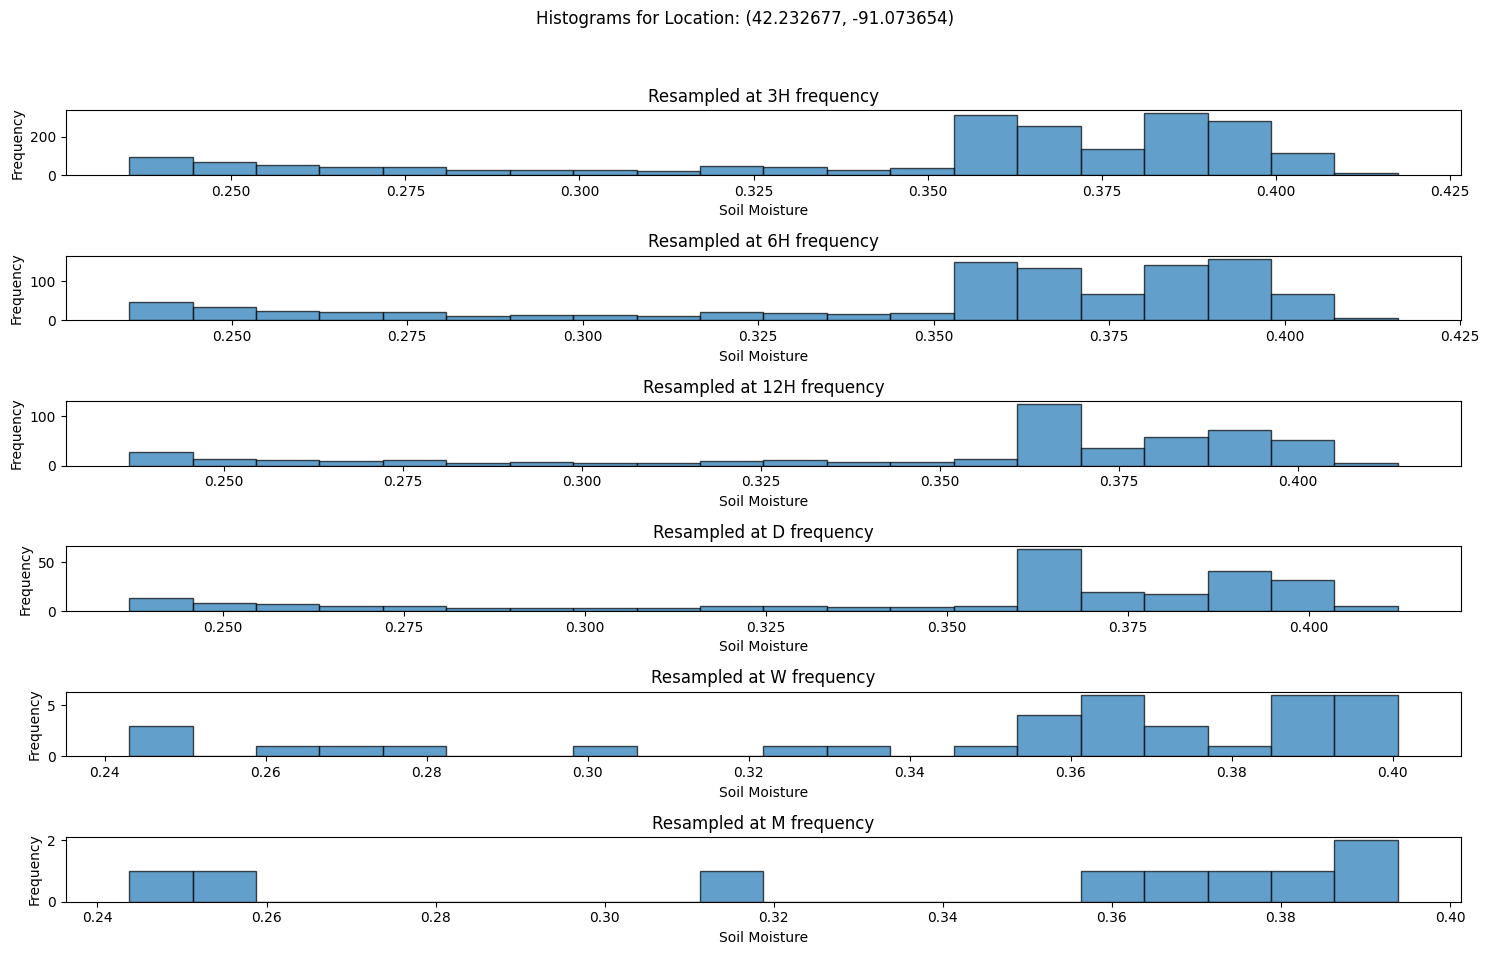

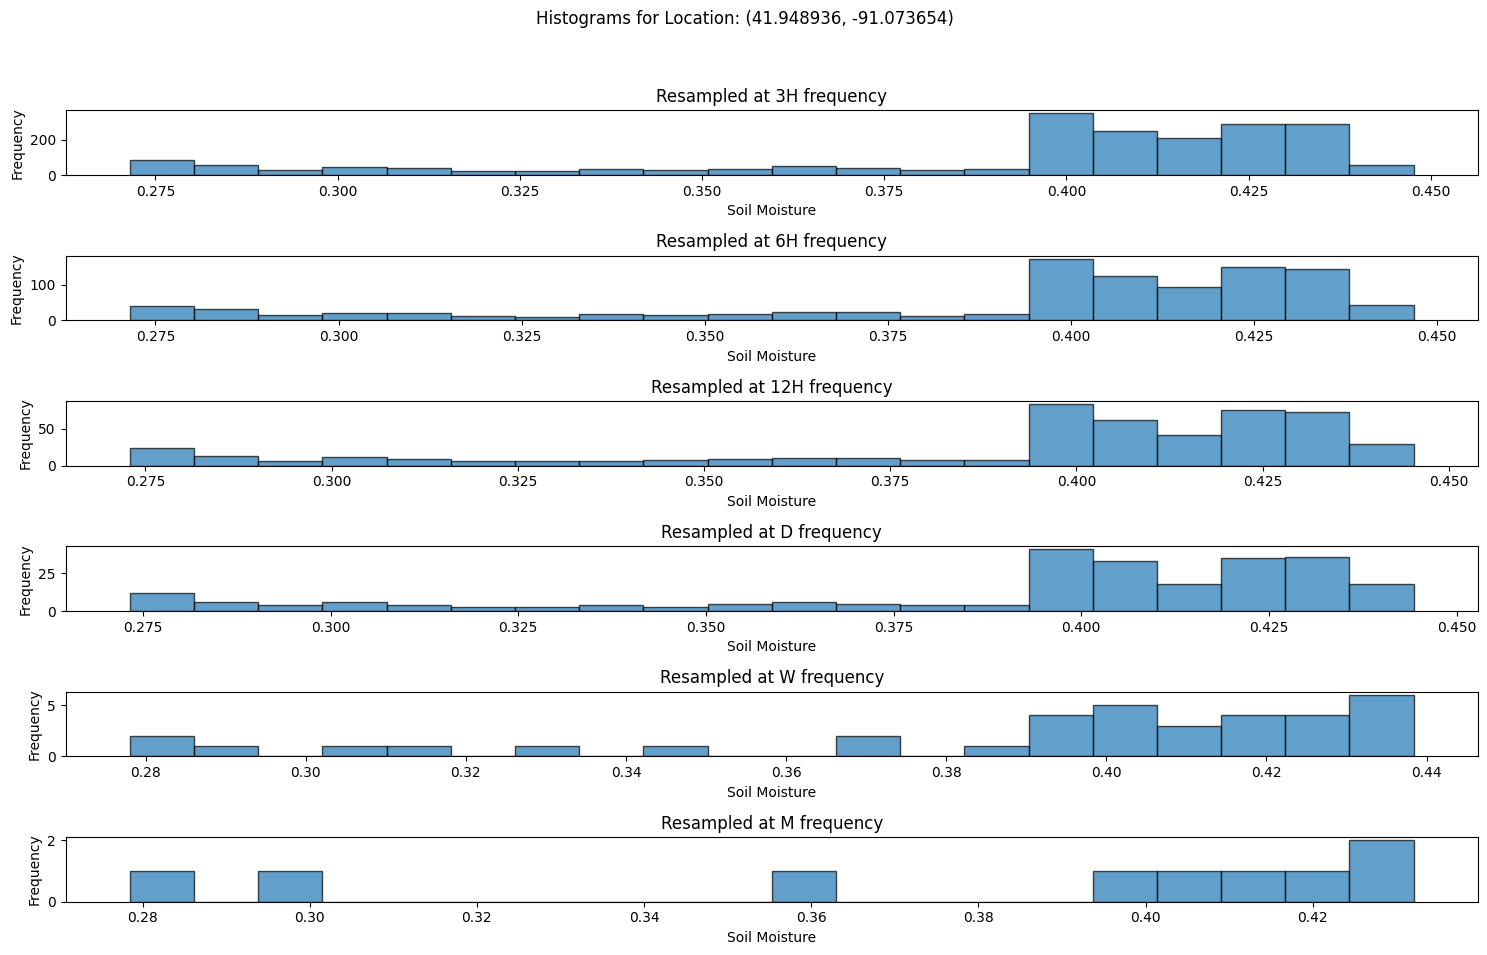

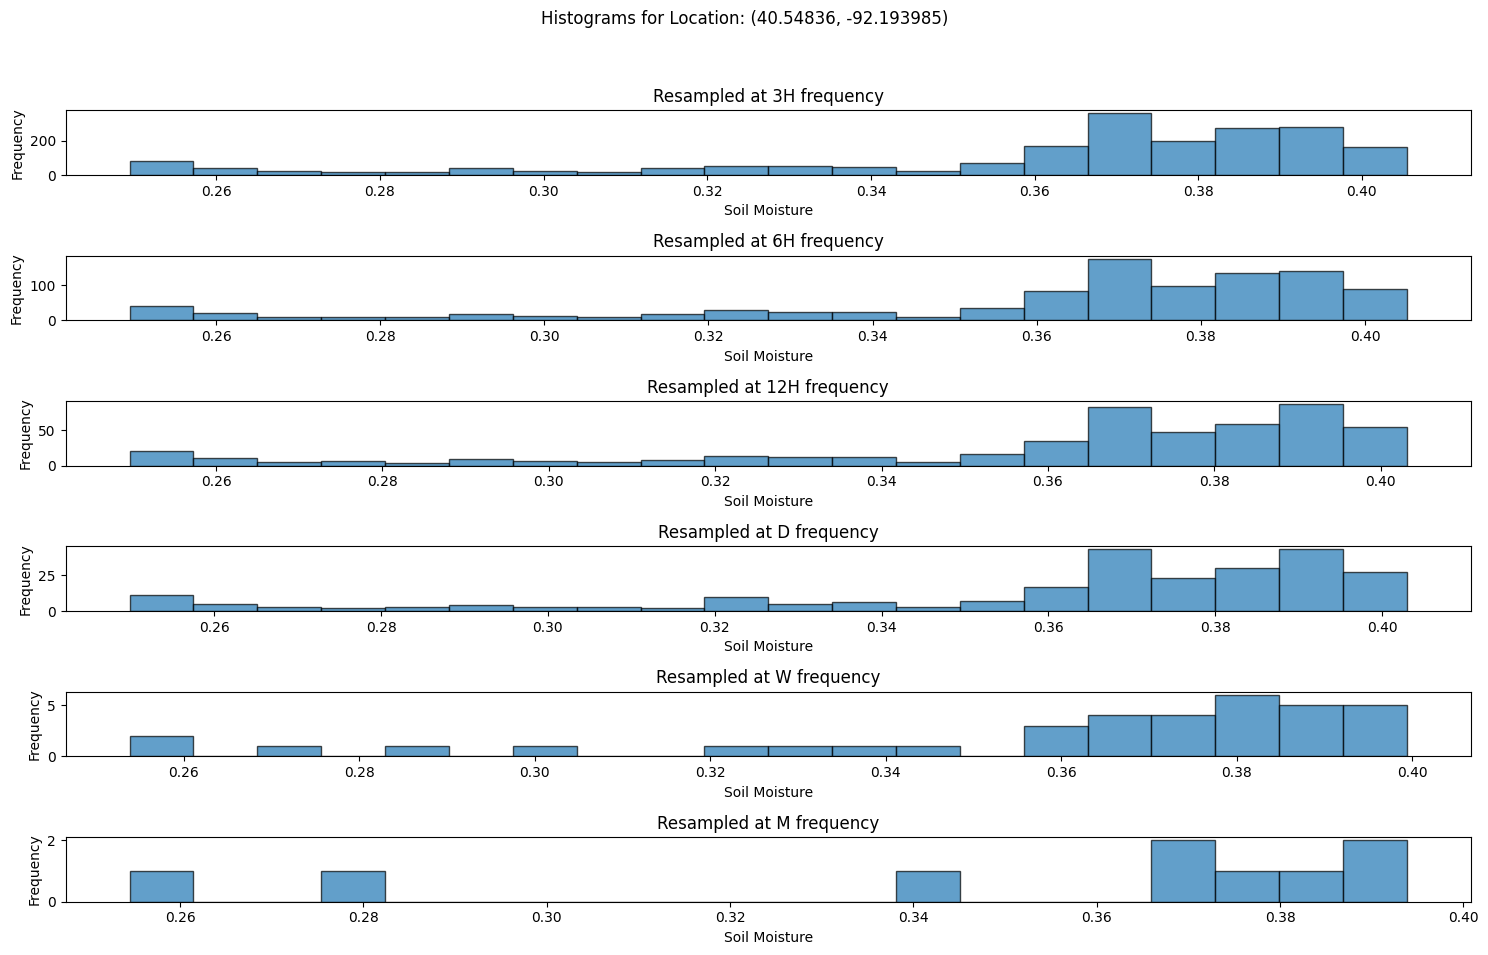

In [17]:
aggs = ['3H', '6H', '12H','D', 'W', 'M']  
randloc = df[['latitude', 'longitude']].drop_duplicates().sample(5)


def histograms(df, aggs, ranloc):
    for _, loc in randloc.iterrows():
        locdata = df[(df['latitude'] == loc['latitude']) & (df['longitude'] == loc['longitude'])]
        locdata.set_index('date', inplace=True)

        plt.figure(figsize=(15, 10))
        plt.suptitle(f"Histograms for Location: ({loc['latitude']}, {loc['longitude']})")

        for i, freq in enumerate(aggs):
            resampled_data = locdata['soil_moisture'].resample(freq).mean().dropna()
            plt.subplot(len(aggs), 1, i + 1)
            plt.hist(resampled_data, bins=20, edgecolor='k', alpha=0.7)
            plt.title(f"Resampled at {freq} frequency")
            plt.xlabel('Soil Moisture')
            plt.ylabel('Frequency')
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


histograms(df, aggs, randloc)


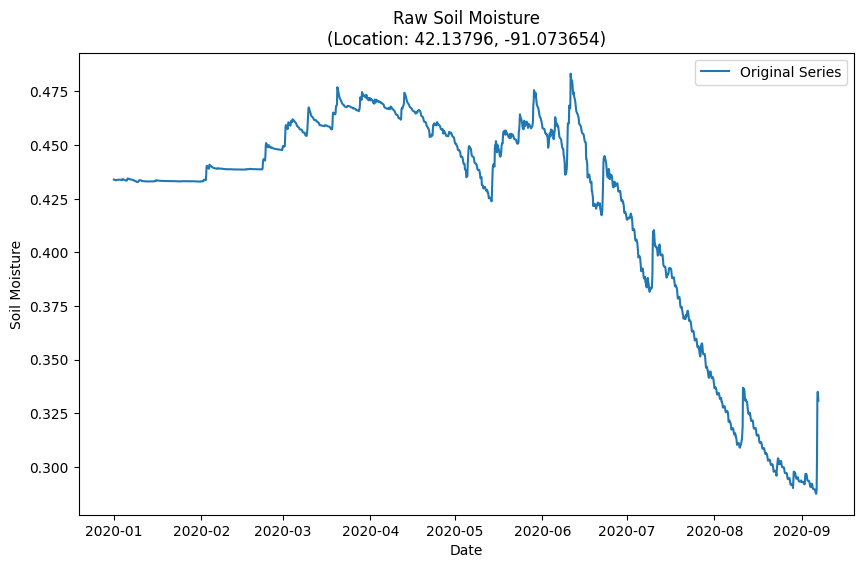

/var/folders/rl/9q_x7dw54pxf8fg3ycvj030c0000gn/T/ipykernel_16907/1358012456.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_df['soil_moisture_diff1'] = loc_df['soil_moisture'].diff()


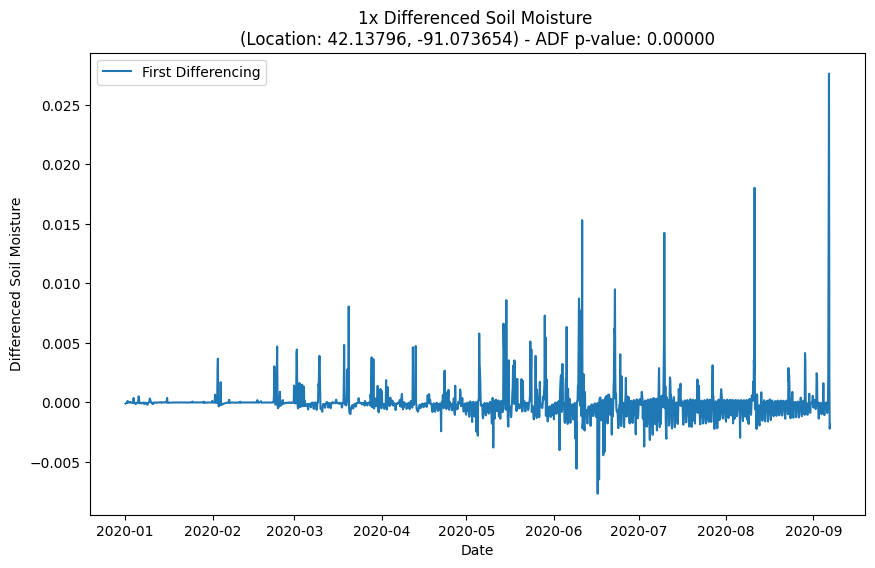

/var/folders/rl/9q_x7dw54pxf8fg3ycvj030c0000gn/T/ipykernel_16907/1358012456.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_df['soil_moisture_diff2'] = loc_df['soil_moisture_diff1'].diff()


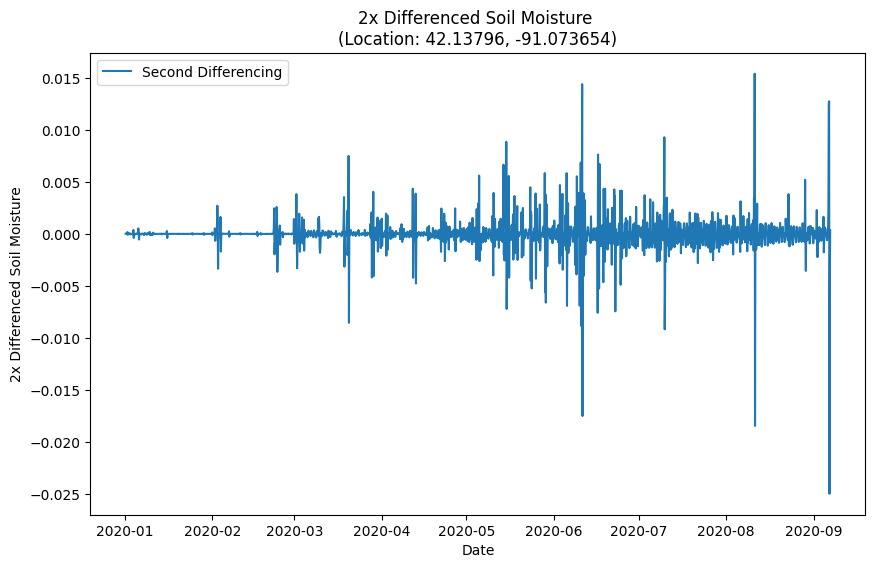

ADF p-value raw: 0.9438863715895912
ADF p-value first diff: 4.981945797822975e-17
ADF p-value second diff: 7.189761487731701e-28


In [21]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
location = df[['latitude', 'longitude']].drop_duplicates().sample(1)
lat, lon = location.iloc[0]['latitude'], location.iloc[0]['longitude']
loc_df = df[(df['latitude'] == lat) & (df['longitude'] == lon)]

def adf_test(series):
    result = adfuller(series.dropna())
    return result[1] 
plt.figure(figsize=(10, 6))
plt.plot(loc_df['soil_moisture'], label='Raw Series')
plt.title(f'Raw Soil Moisture\n(Location: {lat}, {lon})')
plt.xlabel('Date')
plt.ylabel('Soil Moisture')
plt.legend()
plt.show()
loc_df['soil_moisture_diff1'] = loc_df['soil_moisture'].diff()
pVal_diff1 = adf_test(loc_df['soil_moisture_diff1'])

plt.figure(figsize=(10, 6))
plt.plot(loc_df['soil_moisture_diff1'], label='First Differencing')
plt.title(f'1x Differenced Soil Moisture \n(Location: {lat}, {lon}) ')
plt.xlabel('Date')
plt.ylabel('Differenced Soil Moisture')
plt.legend()
plt.show()

loc_df['soil_moisture_diff2'] = loc_df['soil_moisture_diff1'].diff()
pVal_diff2 = adf_test(loc_df['soil_moisture_diff2'])
plt.figure(figsize=(10, 6))
plt.plot(loc_df['soil_moisture_diff2'], label='Second Differencing')
plt.title(f'2x Differenced Soil Moisture \n(Location: {lat}, {lon})')
plt.xlabel('Date')
plt.ylabel('2x Differenced Soil Moisture')
plt.legend()
plt.show()
print(f'ADF p-value raw: {adf_test(loc_df["soil_moisture"])}')
print(f'ADF p-value first diff: {pVal_diff1}')
print(f'ADF p-value second diff: {pVal_diff2}')
